In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

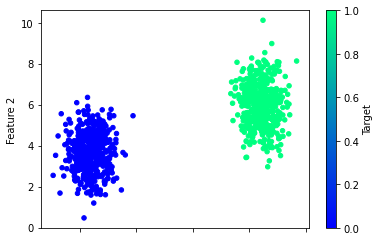

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset (training data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

2022-03-03 12:19:01.148149: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7850 - accuracy: 0.0187
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7718 - accuracy: 0.0293
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7605 - accuracy: 0.0493
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7506 - accuracy: 0.0800
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7424 - accuracy: 0.1013
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7356 - accuracy: 0.1293
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7296 - accuracy: 0.1667
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7247 - accuracy: 0.1960
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7203 - accuracy: 0.2227
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7168 - accuracy: 0.2427
Epoch 11/

24/24 [==============================] - 0s 974us/step - loss: 0.2835 - accuracy: 0.9560
Epoch 83/100
24/24 [==============================] - 0s 914us/step - loss: 0.2763 - accuracy: 0.9587
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2696 - accuracy: 0.9600
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2629 - accuracy: 0.9627
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2565 - accuracy: 0.9653
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2503 - accuracy: 0.9667
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2442 - accuracy: 0.9680
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2384 - accuracy: 0.9680
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2327 - accuracy: 0.9747
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2273 - accuracy: 0.9747
Epoch 92/

<AxesSubplot:>

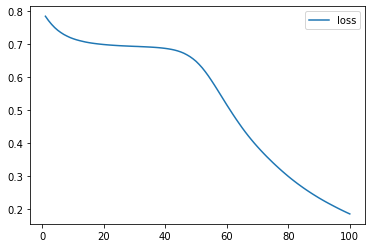

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

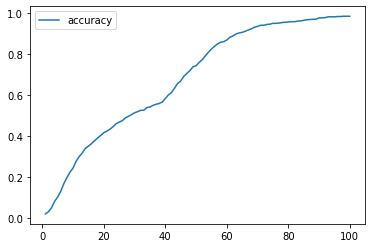

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.1700 - accuracy: 0.9920 - 158ms/epoch - 20ms/step
Loss: 0.17002730071544647, Accuracy: 0.9919999837875366


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

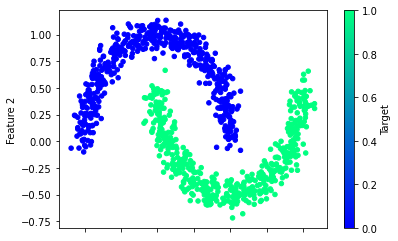

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 1.4219 - accuracy: 0.2987
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2526 - accuracy: 0.3107
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1350 - accuracy: 0.3240
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0558 - accuracy: 0.3480
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9981 - accuracy: 0.3600
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9548 - accuracy: 0.3720
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9194 - accuracy: 0.3893
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8912 - accuracy: 0.4000
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8668 - accuracy: 0.4147
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8459 - accuracy: 0.4307
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.7427
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.7440
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4885 - accuracy: 0.7453
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7453
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.7480
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.7493
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.7507
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.7533
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.7560
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.7573
Epoch 93/100


<AxesSubplot:>

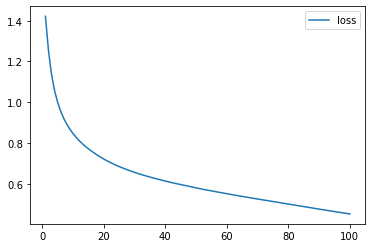

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

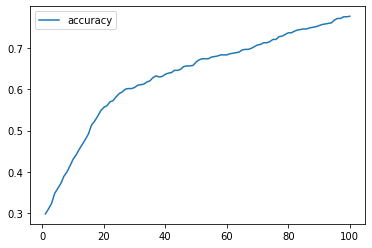

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [21]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [22]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6269 - accuracy: 0.5987
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.6280
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5554 - accuracy: 0.6880
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5258 - accuracy: 0.7267
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4989 - accuracy: 0.7707
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.8080
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4526 - accuracy: 0.8347
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.8493
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8627
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3977 - accuracy: 0.8773
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2161 - accuracy: 0.9027
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2152 - accuracy: 0.9040
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2141 - accuracy: 0.9040
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2131 - accuracy: 0.9040
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2120 - accuracy: 0.9040
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2110 - accuracy: 0.9053
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2098 - accuracy: 0.9053
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2086 - accuracy: 0.9053
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2075 - accuracy: 0.9093
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2063 - accuracy: 0.9080
Epoch 93/100
